In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('./datasets/train.csv')
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
print(df.shape)
print(df.info())

(800, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_a

In [5]:
column= df.select_dtypes(include=['object'])
for c in column.columns:
    print(column[c].value_counts())


gender
m    530
f    270
Name: count, dtype: int64
ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64
jaundice
no     615
yes    185
Name: count, dtype: int64
austim
no     669
yes    131
Name: count, dtype: int64
contry_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia 

In [6]:
df= df.replace({'yes':1, 'no':0,'?': 'Others','others':'Others'})
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,Others,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0


**EXPLORATORY DATA ANALYSIS**

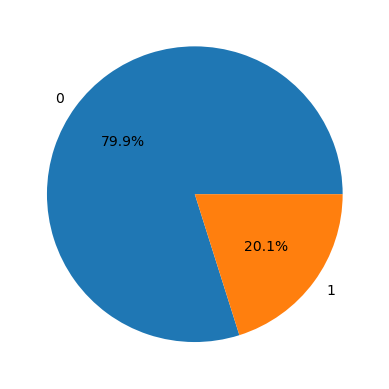

In [7]:
plt.pie(df['Class/ASD'].value_counts().values,
        labels= df['Class/ASD'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [8]:
ints =[]
objects=[]
floats=[]

for col in df.columns:
    if df[col].dtype == 'int64':
        ints.append(col)
    elif df[col].dtype== object:
        objects.append(col)
    else:
        floats.append(col)

In [9]:
ints.remove('ID')
ints.remove('Class/ASD')

In [10]:
print(ints)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before']


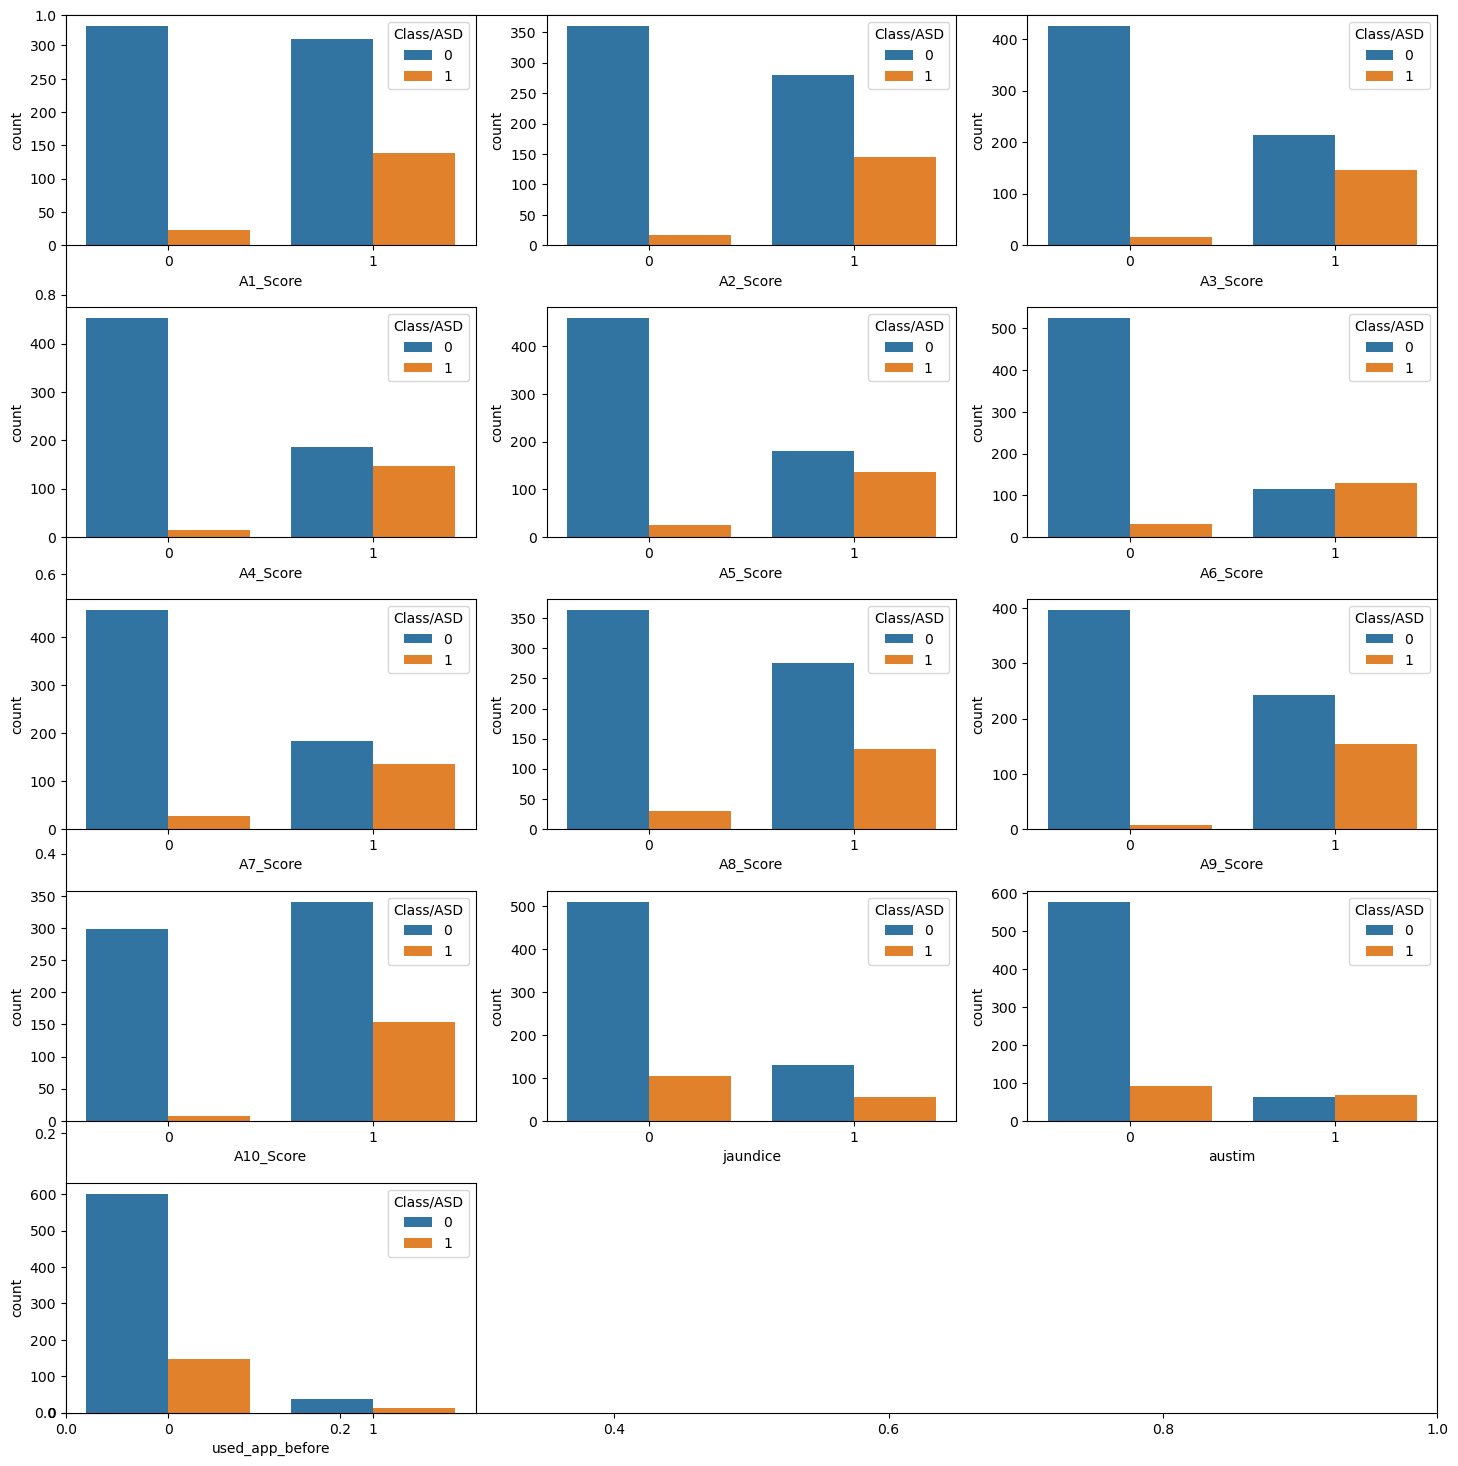

In [11]:
df_melted = df.melt(id_vars= ['ID','Class/ASD'] , value_vars= ints, var_name= 'col', value_name ='value')
plt.subplots(figsize=(15,15))

for i , col in enumerate(ints):
    plt.subplot(5,3,i+1)
    sns.countplot(x='value',hue='Class/ASD',
    data= df_melted[df_melted['col']== col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

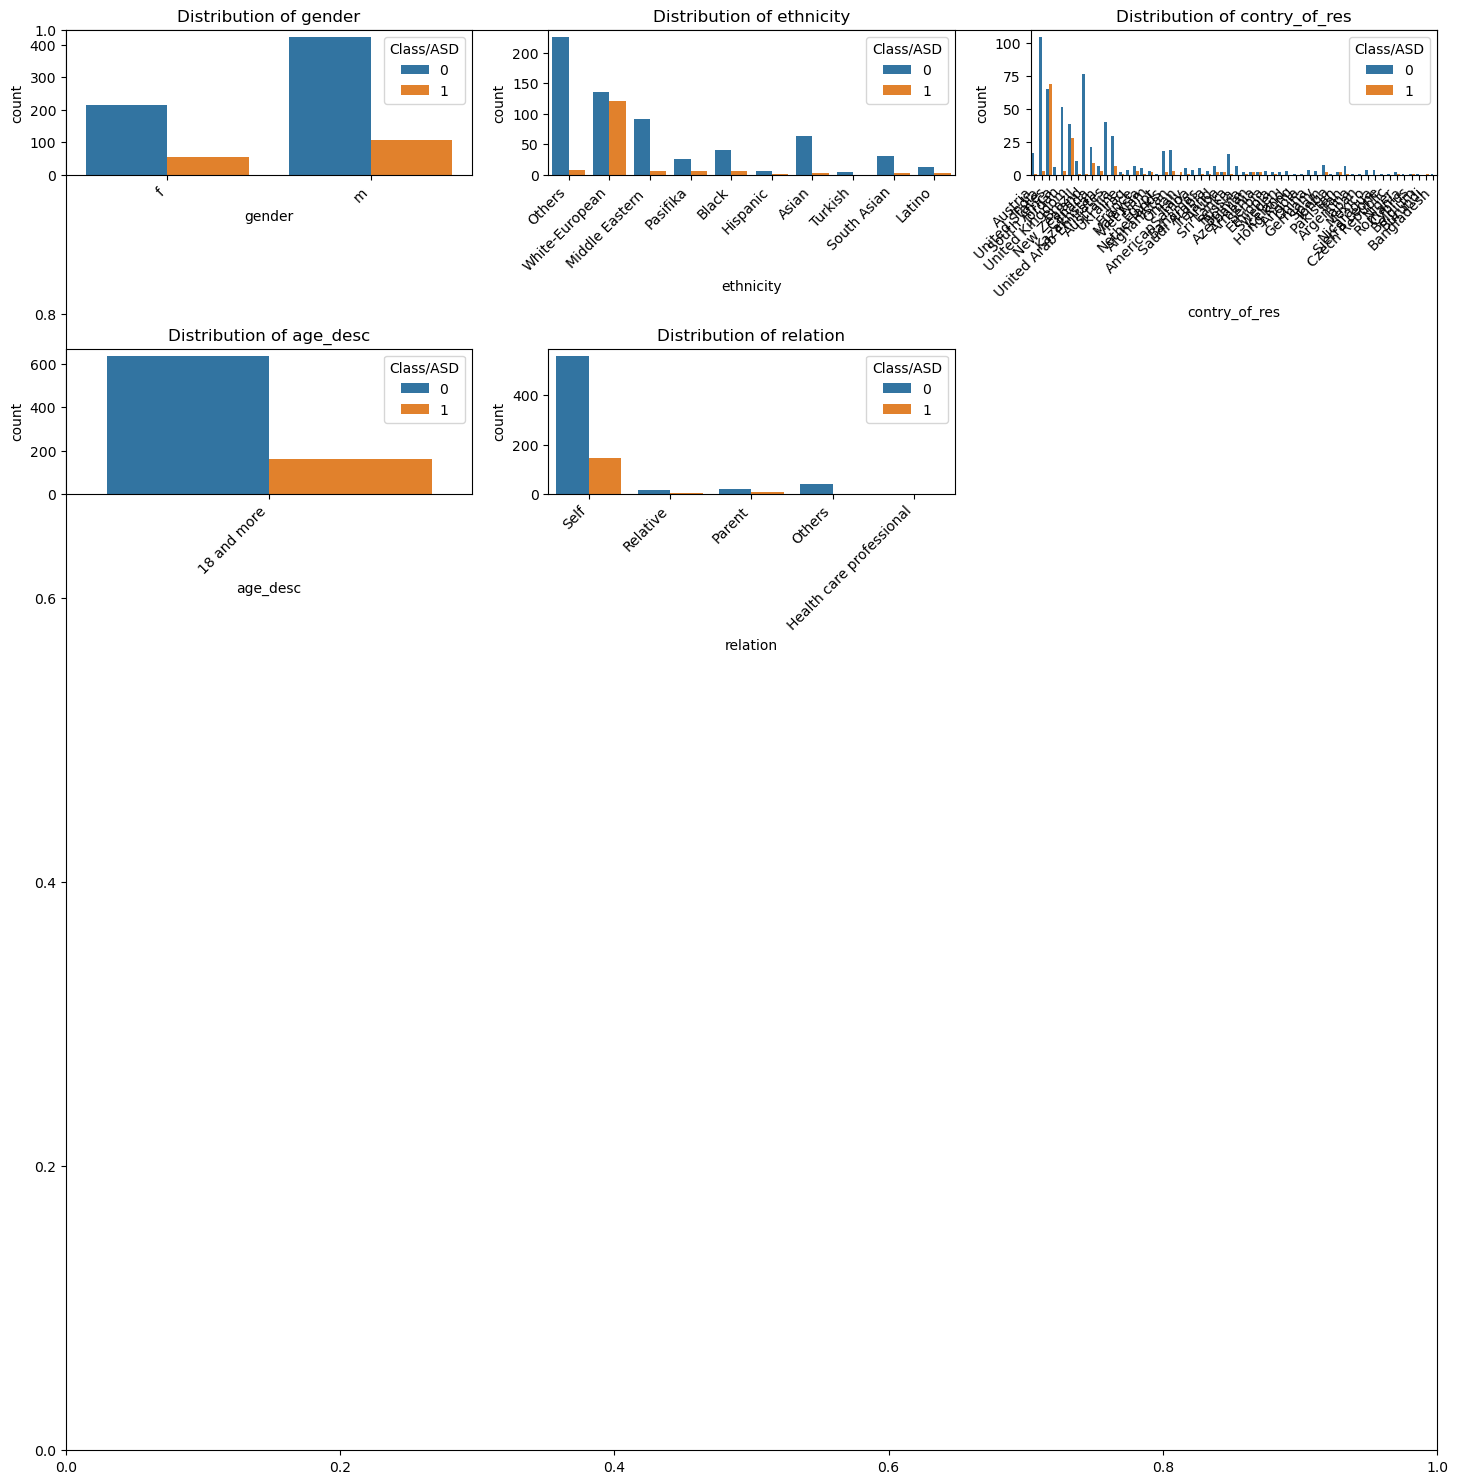

In [12]:
plt.subplots(figsize=(15,15))
for i, col in enumerate(objects):
    plt.subplot(5,3,i+1)
    sns.countplot(x= col, hue='Class/ASD', data= df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

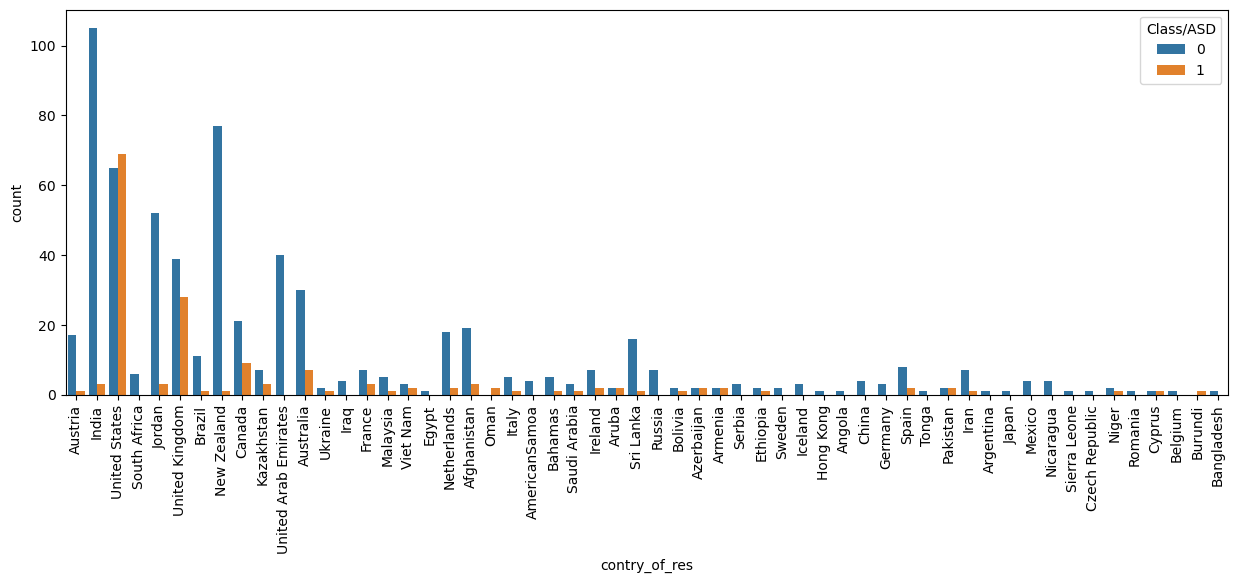

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation= 90)
plt.show()

In [14]:
print(floats)

['age', 'result']


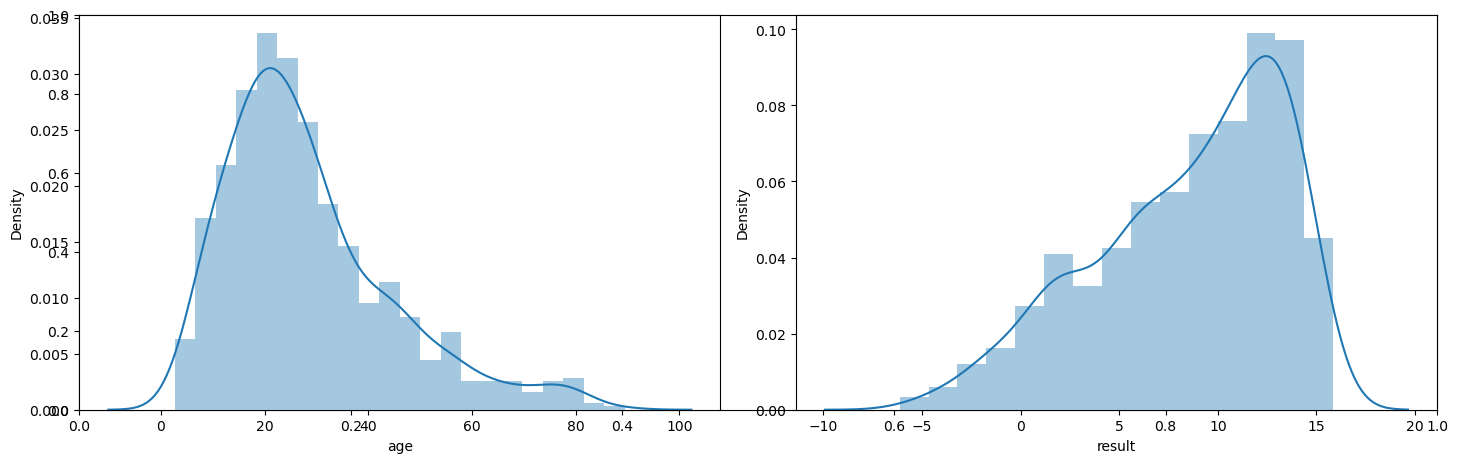

In [15]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])

plt.tight_layout()
plt.show()

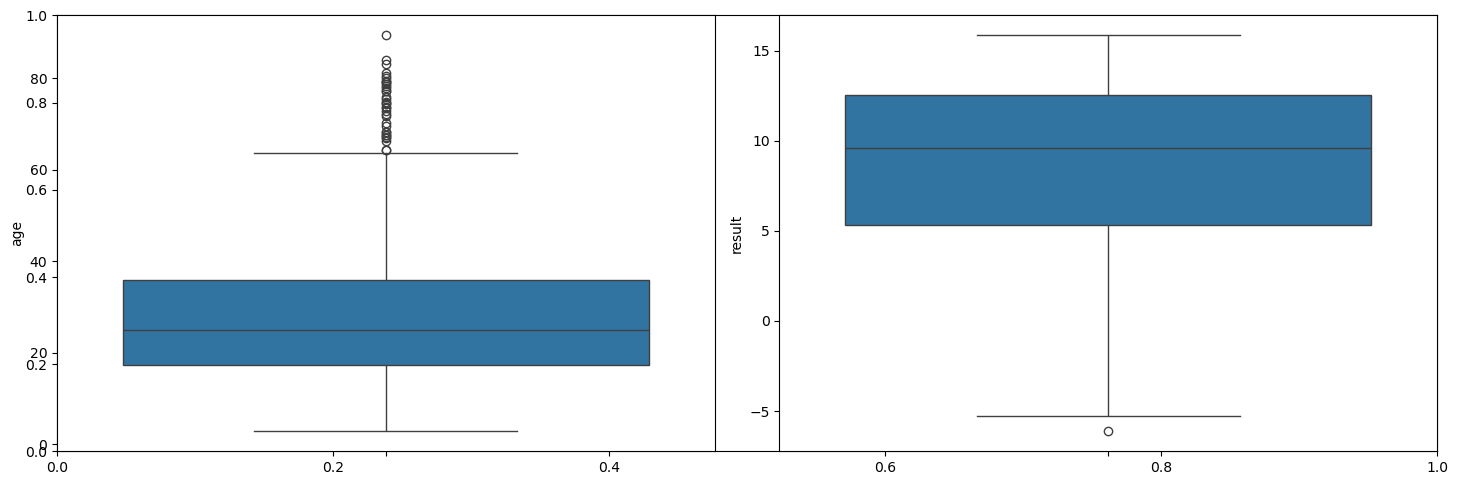

In [16]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col])

plt.tight_layout()
plt.show()

In [17]:
df= df[df['result']>-5]
df.shape

(798, 22)

**FEATURE ENGINEERING**

In [18]:
def convertAge(age):
    if age<4:
        return 'Toddler'
    elif age<12:
        return 'Kid'
    elif age <18:
        return 'Teenager'
    elif age< 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup']= df['age'].apply(convertAge)

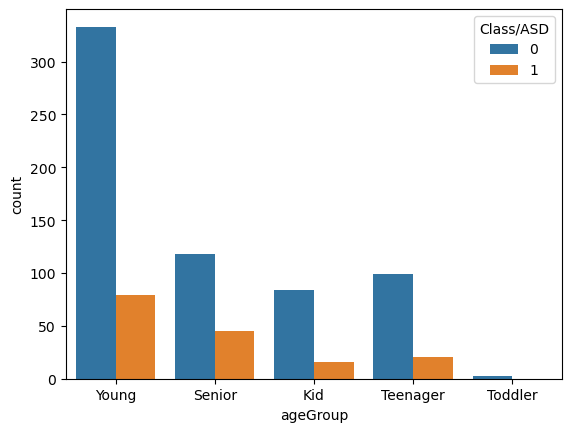

In [19]:
sns.countplot(data= df, x= 'ageGroup', hue='Class/ASD')
plt.show()

In [20]:
def add_feature(data):
    data['sum_score']=0
    for col in data.loc[:, 'A1_Score':'A10_Score'].columns:
        data['sum_score']+= data[col]
    data['ind']= data['austim']+data['used_app_before']+data['jaundice']
    return data 

df= add_feature(df)

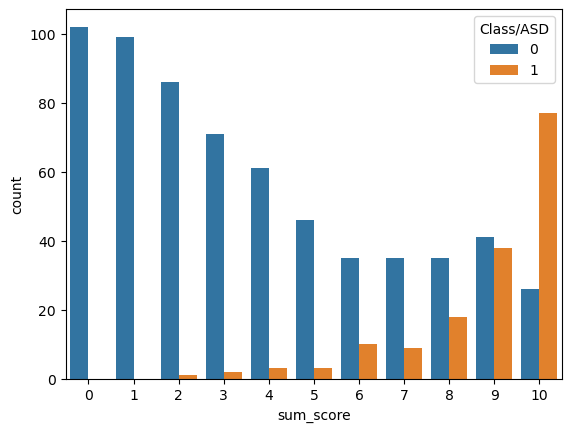

In [21]:
sns.countplot(x=df['sum_score'],hue=df['Class/ASD'])
plt.show()

In [22]:
df['age']= df['age'].apply(lambda x:np.log(x))


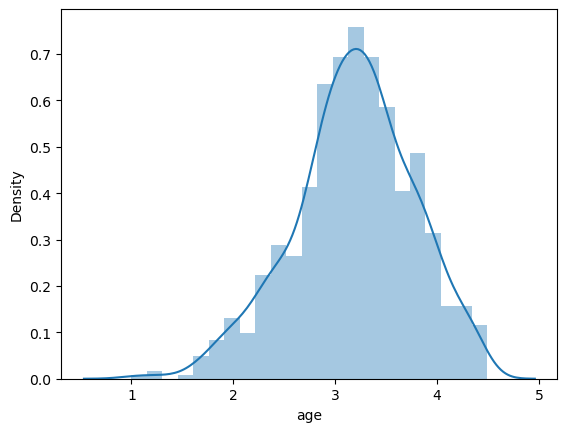

In [23]:
sns.distplot(df['age'])
plt.show()

In [24]:
df.select_dtypes(include='object')

,gender,ethnicity,contry_of_res,age_desc,relation,ageGroup
0,f,Others,Austria,18 and more,Self,Young
1,m,Others,India,18 and more,Self,Senior
2,m,White-European,United States,18 and more,Self,Kid
3,f,Others,United States,18 and more,Self,Young
4,m,Others,South Africa,18 and more,Self,Senior
...,...,...,...,...,...,...
795,m,Hispanic,New Zealand,18 and more,Self,Teenager
796,m,White-European,Cyprus,18 and more,Self,Young
797,m,South Asian,New Zealand,18 and more,Self,Kid
798,f,Others,Canada,18 and more,Self,Teenager


In [25]:
df['gender']= df['gender'].map({'f':0 , 'm':1})

In [26]:
age_map= {
    'Toddler':0,
    'Kid':1,
    'Teenager':2,
    'Young':3,
    'Senior':4
}

df['ageGroup']= df['ageGroup'].map(age_map)

In [27]:
df= pd.get_dummies(
    df,
    columns=['relation'],
    drop_first=True
)

In [28]:
df= df.drop(columns='ethnicity', axis=0)

In [29]:
freq = df['contry_of_res'].value_counts(normalize=True)
df['contry_of_res_freq'] = df['contry_of_res'].map(freq)

# df.drop(columns=['contry_of_res'], inplace=True)


In [30]:
df['contry_of_res_freq']

0      0.022556
1      0.134085
2      0.167920
3      0.167920
4      0.007519
         ...   
795    0.097744
796    0.002506
797    0.097744
798    0.037594
799    0.050125
Name: contry_of_res_freq, Length: 798, dtype: float64

In [31]:
contry_freq_map= df['contry_of_res_freq'].groupby(df['contry_of_res']).first()

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 799
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  798 non-null    int64  
 1   A1_Score            798 non-null    int64  
 2   A2_Score            798 non-null    int64  
 3   A3_Score            798 non-null    int64  
 4   A4_Score            798 non-null    int64  
 5   A5_Score            798 non-null    int64  
 6   A6_Score            798 non-null    int64  
 7   A7_Score            798 non-null    int64  
 8   A8_Score            798 non-null    int64  
 9   A9_Score            798 non-null    int64  
 10  A10_Score           798 non-null    int64  
 11  age                 798 non-null    float64
 12  gender              798 non-null    int64  
 13  jaundice            798 non-null    int64  
 14  austim              798 non-null    int64  
 15  contry_of_res       798 non-null    object 
 16  used_app_befo

In [33]:
df= df.drop(columns=['contry_of_res','age_desc'], axis=0)

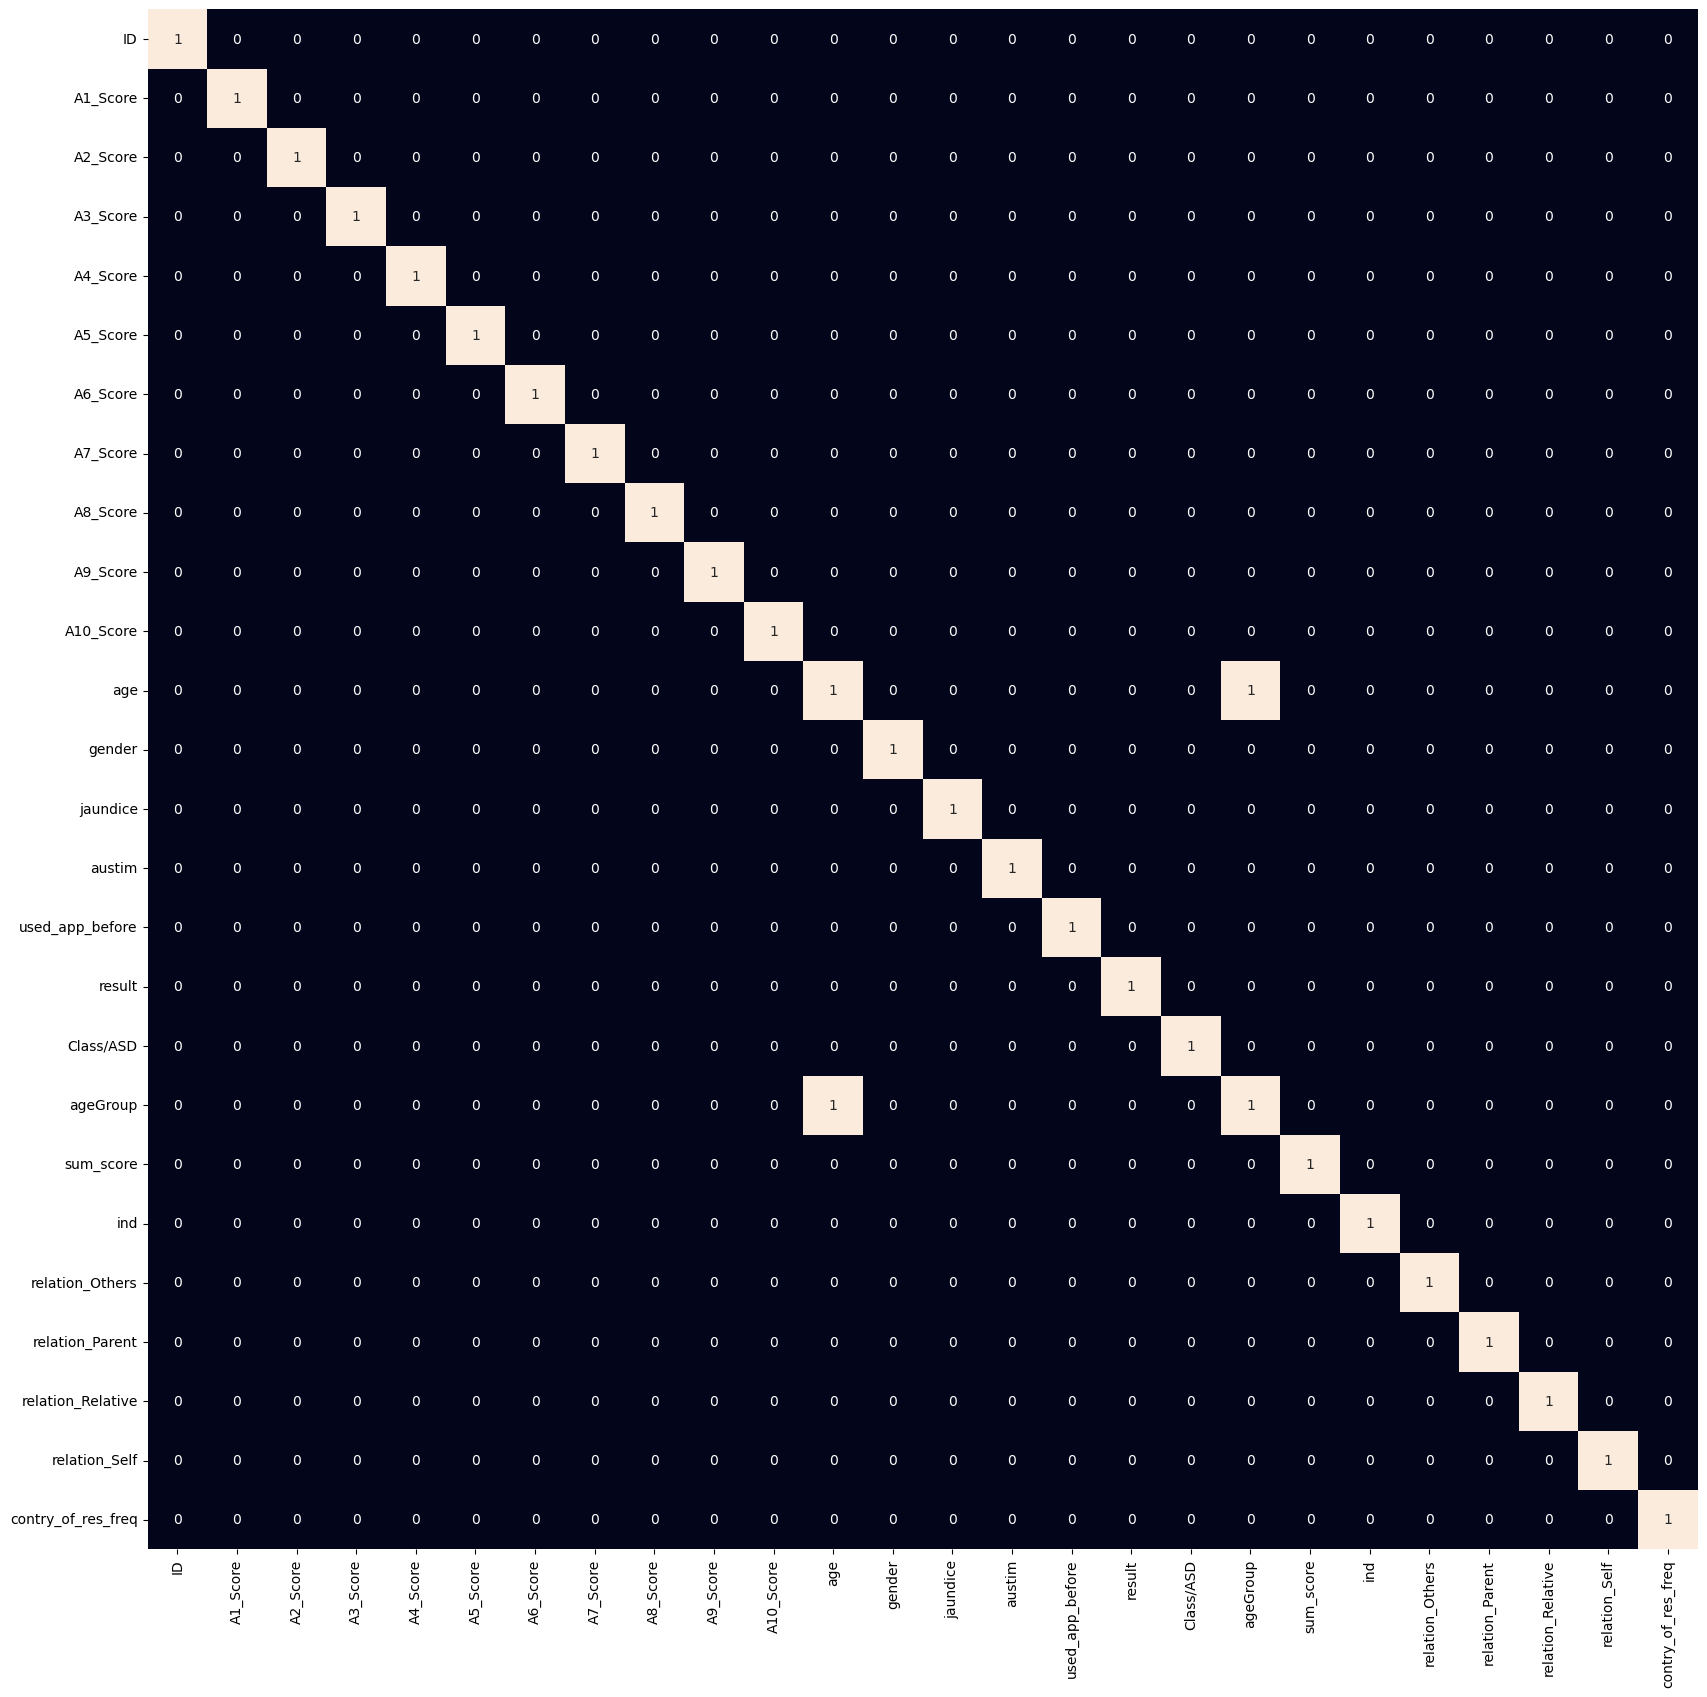

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr()>0.8,annot=True,cbar=False)
plt.show()

In [35]:
remove= ['ID','used_app_before','austim','sum_score','result','ind','ageGroup']
features= df.drop(remove+['Class/ASD'],axis=1)
target= df['Class/ASD']

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler ,SMOTE
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [37]:
x_train,x_test,y_train ,y_test= train_test_split(features, target,test_size=0.2, random_state=10,stratify= target)
sm = SMOTE(random_state=42)
x,y = sm.fit_resample(x_train, y_train)
# ros= RandomOverSampler(sampling_strategy='minority',random_state=0)
# x,y= ros.fit_resample(x_train, y_train)
x.shape, y.shape

((1018, 18), (1018,))

In [38]:
scaler= StandardScaler()
x= scaler.fit_transform(x)
x_test= scaler.transform(x_test)

In [39]:
models=[LogisticRegression(), XGBClassifier(), AdaBoostClassifier(), SVC(kernel ='rbf')]
for model in models:
    model.fit(x,y)
    print(f"{model} :")
    print('Training Accuracy :',metrics.roc_auc_score(y, model.predict(x)))
    print('Validation Accuracy :', metrics.roc_auc_score(y_test, model.predict(x_test)))
    print()

LogisticRegression() :
Training Accuracy : 0.8526522593320236
Validation Accuracy : 0.83203125

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) :
Training Accuracy : 0.9960707269155206
Validation Accuracy : 0.75

AdaBoostClassifier() :
Training Accuracy : 0.8742632612966602
Validation A

In [40]:
m= LogisticRegression()
m= m.fit(x,y)
y_pred= m.predict(x_test)

In [41]:
# y_prob = m.predict_proba(x_test)[:,1]
# threshold= 0.45
# y_test_pred= (y_prob >= threshold).astype(int)

In [42]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[101,  27],
       [  4,  28]], dtype=int64)

In [43]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       128
           1       0.51      0.88      0.64        32

    accuracy                           0.81       160
   macro avg       0.74      0.83      0.76       160
weighted avg       0.87      0.81      0.82       160



In [44]:
import joblib
joblib.dump((m,scaler, contry_freq_map), 'autism_model.pkl')

['autism_model.pkl']

In [45]:
m,scaler, contry_freq_map = joblib.load('autism_model.pkl')


In [46]:
y_pred_load= m.predict(x_test)

In [47]:
print(confusion_matrix(y_test, y_pred_load))
print(classification_report(y_test, y_pred_load))

[[101  27]
 [  4  28]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       128
           1       0.51      0.88      0.64        32

    accuracy                           0.81       160
   macro avg       0.74      0.83      0.76       160
weighted avg       0.87      0.81      0.82       160



In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 799
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  798 non-null    int64  
 1   A1_Score            798 non-null    int64  
 2   A2_Score            798 non-null    int64  
 3   A3_Score            798 non-null    int64  
 4   A4_Score            798 non-null    int64  
 5   A5_Score            798 non-null    int64  
 6   A6_Score            798 non-null    int64  
 7   A7_Score            798 non-null    int64  
 8   A8_Score            798 non-null    int64  
 9   A9_Score            798 non-null    int64  
 10  A10_Score           798 non-null    int64  
 11  age                 798 non-null    float64
 12  gender              798 non-null    int64  
 13  jaundice            798 non-null    int64  
 14  austim              798 non-null    int64  
 15  used_app_before     798 non-null    int64  
 16  result       

In [49]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,result,Class/ASD,ageGroup,sum_score,ind,relation_Others,relation_Parent,relation_Relative,relation_Self,contry_of_res_freq
0,1,1,0,1,0,1,0,1,0,1,...,6.351166,0,3,6,0,False,False,False,True,0.022556
1,2,0,0,0,0,0,0,0,0,0,...,2.255185,0,4,0,0,False,False,False,True,0.134085
2,3,1,1,1,1,1,1,1,1,1,...,14.851484,1,1,10,1,False,False,False,True,0.167920
3,4,0,0,0,0,0,0,0,0,0,...,2.276617,0,3,0,0,False,False,False,True,0.167920
4,5,0,0,0,0,0,0,0,0,0,...,-4.777286,0,4,0,0,False,False,False,True,0.007519


In [50]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 799
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   A1_Score            798 non-null    int64  
 1   A2_Score            798 non-null    int64  
 2   A3_Score            798 non-null    int64  
 3   A4_Score            798 non-null    int64  
 4   A5_Score            798 non-null    int64  
 5   A6_Score            798 non-null    int64  
 6   A7_Score            798 non-null    int64  
 7   A8_Score            798 non-null    int64  
 8   A9_Score            798 non-null    int64  
 9   A10_Score           798 non-null    int64  
 10  age                 798 non-null    float64
 11  gender              798 non-null    int64  
 12  jaundice            798 non-null    int64  
 13  relation_Others     798 non-null    bool   
 14  relation_Parent     798 non-null    bool   
 15  relation_Relative   798 non-null    bool   
 16  relation_Self

In [51]:
features.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,relation_Others,relation_Parent,relation_Relative,relation_Self,contry_of_res_freq
0,1,0,1,0,1,0,1,0,1,1,3.642122,0,0,False,False,False,True,0.022556
1,0,0,0,0,0,0,0,0,0,0,3.865990,1,0,False,False,False,True,0.134085
2,1,1,1,1,1,1,1,1,1,1,1.998824,1,0,False,False,False,True,0.167920
3,0,0,0,0,0,0,0,0,0,0,3.159632,0,0,False,False,False,True,0.167920
4,0,0,0,0,0,0,0,0,0,0,3.765975,1,0,False,False,False,True,0.007519


In [52]:
from collections import Counter
Counter(y_pred)

Counter({0: 105, 1: 55})